### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv("../data/RentPrices.csv")


In [3]:
data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [23]:
form_input = {
    "bedroom": int,
    "bathroom": int,
    "area": float,
    
    "layout_type":list(('BHK', 'RK','Other')),
    "seller_type":list(('OWNER', 'AGENT', 'BUILDER','Other')),
    "furnish_type":list(('Furnished', 'Semi-Furnished', 'Unfurnished', 'Other')),
    
    "city":list(('Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad','Kolkata', 'Mumbai', 'Pune','Other')),
    "property_type":list(('Apartment', 'Studio Apartment', 'Independent House','Independent Floor', 'Villa', 'Penthouse','Other')),
    "locality": list(('Wagholi', 'Hinjewadi', 'Wakad', 'Hadapsar', 'Kharadi', 'Bavdhan', 'Pimple Saudagar', 'Dhanori', 'Wadgaon Sheri', 'Baner', 'Thane West', 'Kharghar', 'Ulwe', 'Mira Road East', 'Kandivali East', 'Ghansoli', 'Dombivali', 'Andheri East', 'Kalyan West', 'Dombivli (West)', 'New Town', 'Kasba', 'Rajarhat', 'Keshtopur', 'Garia', 'Tollygunge', 'Behala', 'Patuli', 'VIP Nagar', 'Tagore Park', 'Kondapur', 'Kukatpally', 'Madhapur', 'Begumpet', 'Manikonda', 'Gachibowli', 'Miyapur', 'Ameerpet', 'Nallakunta', 'Chandanagar', 'Saket', 'Chattarpur', 'New Ashok Nagar', 'Uttam Nagar', 'Sheikh Sarai', 'Patel Nagar', 'Preet Vihar', 'Lajpat Nagar', 'Paschim Vihar', 'laxmi nagar', 'Velachery', 'Sholinganallur', 'Thiruvanmiyur', 'Madipakkam', 'Choolaimedu', 'Medavakkam', 'Perumbakkam', 'Perungudi', 'Vadapalani', 'Pallikaranai', 'HSR Layout', 'Mahadevapura', 'BTM Layout', 'Marathahalli', 'Indira Nagar', 'Electronic City Phase 1', 'Whitefield', 'CV Raman Nagar', 'Electronics City', 'Krishnarajapura', 'Bopal', 'Gota', 'Near Nirma University On SG Highway', 'Shela', 'Jodhpur', 'Chandkheda', 'Motera', 'Bodakdev', 'Prahlad Nagar', 'Makarba','Other')),
    
}


In [ ]:
<label for="smoking_status"><b>Smoking status</b></label>
            <select name="smoking_status" class="form-control">
                <option value="formerly smoked">Formerly smoked</option>
                <option value="never smoked">Never smoked</option>
                <option value="smokes">Smokes</option>
                <option value="Unknown">Unknown</option>
            </select>

In [40]:
field = "locality"
print(f"<label for='{field}'><b>{field}</b></label>")

print(f"<select name='{field}' class='form-control'>")

for ele in form_input[field]:
    print(f"""<option value="{ele}">{ele}</option>""")
print("</select>")

<label for='locality'><b>locality</b></label>
<select name='locality' class='form-control'>
<option value="Wagholi">Wagholi</option>
<option value="Hinjewadi">Hinjewadi</option>
<option value="Wakad">Wakad</option>
<option value="Hadapsar">Hadapsar</option>
<option value="Kharadi">Kharadi</option>
<option value="Bavdhan">Bavdhan</option>
<option value="Pimple Saudagar">Pimple Saudagar</option>
<option value="Dhanori">Dhanori</option>
<option value="Wadgaon Sheri">Wadgaon Sheri</option>
<option value="Baner">Baner</option>
<option value="Thane West">Thane West</option>
<option value="Kharghar">Kharghar</option>
<option value="Ulwe">Ulwe</option>
<option value="Mira Road East">Mira Road East</option>
<option value="Kandivali East">Kandivali East</option>
<option value="Ghansoli">Ghansoli</option>
<option value="Dombivali">Dombivali</option>
<option value="Andheri East">Andheri East</option>
<option value="Kalyan West">Kalyan West</option>
<option value="Dombivli (West)">Dombivli (West)</

In [4]:
data = data.loc[(data.price > 2000) & (data.price < 30000)]

In [17]:
data.city.unique() 

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Kolkata', 'Mumbai', 'Pune'], dtype=object)

In [12]:
ord_cols = ['seller_type', 'layout_type','furnish_type']

ohe_cols = ['property_type','city']

num_cols = ['bedroom', 'area', 'bathroom']


In [6]:

ord_preprocessor = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)

ohe_preprocessor = OneHotEncoder(handle_unknown='ignore')

num_preprocessor = RobustScaler()

preprocessor = ColumnTransformer([
    ('pipe1', ord_preprocessor, ord_cols),
    ('pipe2', num_preprocessor, num_cols),
    ('pipe3', ohe_preprocessor, ohe_cols)
])


In [13]:
features = ord_cols + ohe_cols + num_cols

In [17]:
data[features+['price']].to_csv("../data/RentPrices2.csv", index=False)

In [8]:

X = data[features]
y = data.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
_ = preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
y_train_transformed = np.log1p(y_train)


X_test_transformed = preprocessor.transform(X_test)
y_test_transformed = np.log1p(y_test)

In [43]:
pickle.dump(preprocessor, open("../models/pipeline.pkl", 'wb'))

In [10]:
def get_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    r2 = r2_score(actual, pred)
    return rmse, r2

RMSE:  4898.921296343398
R2:  0.4107973341785939


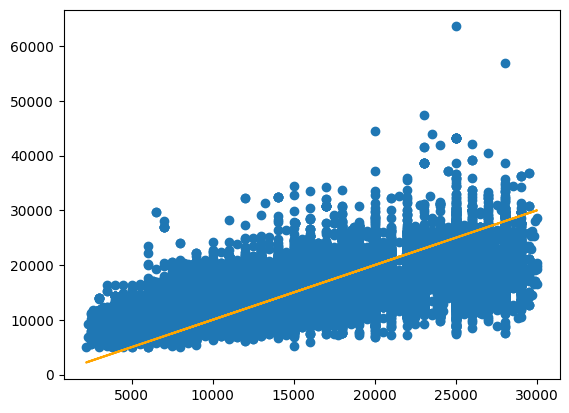

In [75]:
model = LinearRegression()

_ = model.fit(X_train_transformed, y_train_transformed)

predictions = np.expm1(model.predict(X_test_transformed))

rmse, r2 = get_metrics(y_test, predictions)

print("RMSE: ", rmse)
print("R2: ", r2)

_ = plt.scatter(y_test, predictions)
_ = plt.plot(y_test, y_test, color='orange')
plt.show()

import pickle
pickle.dump(model, open("../models/linreg.pkl", 'wb'))

RMSE:  6531.414145569886
R2:  -0.04731716967118338


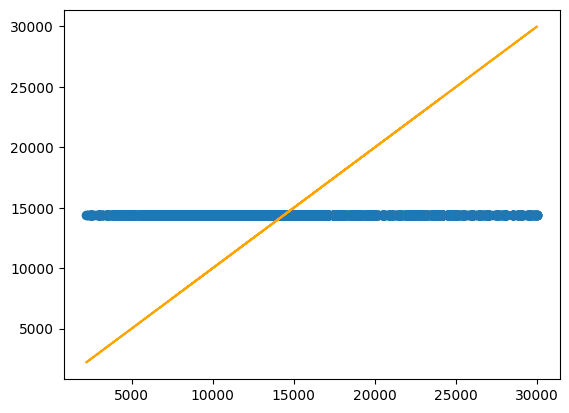

In [32]:
model = Lasso(alpha=0.5)

_ = model.fit(X_train_transformed, y_train_transformed)

predictions = np.expm1(model.predict(X_test_transformed))

rmse, r2 = get_metrics(y_test, predictions)

print("RMSE: ", rmse)
print("R2: ", r2)

_ = plt.scatter(y_test, predictions)
_ = plt.plot(y_test, y_test, color='orange')
plt.show()

RMSE:  4899.178969644531
R2:  0.4107353508236822


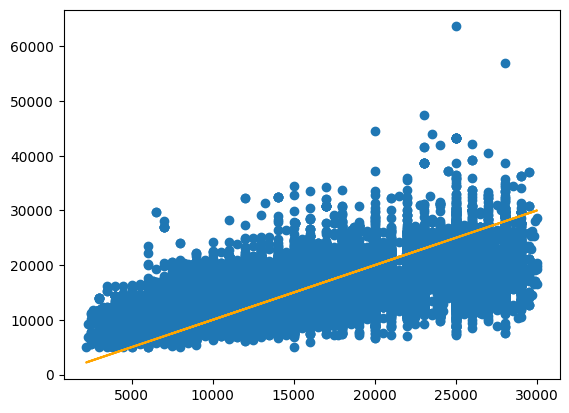

In [36]:
model = Ridge()

_ = model.fit(X_train_transformed, y_train_transformed)

predictions = np.expm1(model.predict(X_test_transformed))

rmse, r2 = get_metrics(y_test, predictions)

print("RMSE: ", rmse)
print("R2: ", r2)

_ = plt.scatter(y_test, predictions)
_ = plt.plot(y_test, y_test, color='orange')
plt.show()

RMSE:  5517.841705048359
R2:  0.25251539387908595


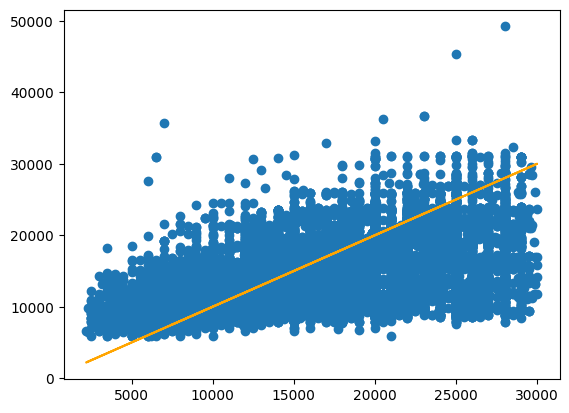

In [73]:
model = RANSACRegressor()

_ = model.fit(X_train_transformed, y_train_transformed)

predictions = np.expm1(model.predict(X_test_transformed))

rmse, r2 = get_metrics(y_test, predictions)

print("RMSE: ", rmse)
print("R2: ", r2)

_ = plt.scatter(y_test, predictions)
_ = plt.plot(y_test, y_test, color='orange')
plt.show()

In [92]:
# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: -0.07671
Feature: 1, Score: -287741863961.42554
Feature: 2, Score: -0.16943
Feature: 3, Score: 0.12806
Feature: 4, Score: 0.14693
Feature: 5, Score: 0.10018
Feature: 6, Score: 671987713709.00708
Feature: 7, Score: 671987713708.93079
Feature: 8, Score: 671987713708.87378
Feature: 9, Score: 671987713708.95020
Feature: 10, Score: 959729577670.15479
Feature: 11, Score: 671987713708.82605
Feature: 12, Score: 345580712510.88983
Feature: 13, Score: 345580712511.11517
Feature: 14, Score: 345580712511.04327
Feature: 15, Score: 345580712511.12500
Feature: 16, Score: 345580712510.99323
Feature: 17, Score: 345580712510.89563
Feature: 18, Score: 345580712511.26038
Feature: 19, Score: 345580712511.12946


### Single Input Prediction

In [6]:
import pickle
import pandas as pd
import numpy as np

user_input = {'seller_type': 'OWNER',
 'layout_type': 'BHK',
 'furnish_type': 'Furnished',
 'property_type': 'Apartment',
 'city': 'Ahmedabad',
 'bedroom': 2.0,
 'area': 1450.0,
 'bathroom': 2.0}

x = pd.DataFrame(user_input, index=[1])

preprocessor = pickle.load(open("../models/pipeline.pkl", 'rb'))
model = pickle.load(open("../models/linreg.pkl", 'rb'))

pred = np.expm1(model.predict(preprocessor.transform(x))[0])

In [7]:
pred

16119.809161723033

In [24]:
df = pd.read_csv("../data/RentPrices2.csv")

In [25]:
df.head()

,seller_type,layout_type,furnish_type,property_type,city,bedroom,area,bathroom,price
0,OWNER,BHK,Furnished,Apartment,Ahmedabad,2.0,1450.0,2.0,20000.0
1,OWNER,RK,Semi-Furnished,Studio Apartment,Ahmedabad,1.0,210.0,1.0,7350.0
2,OWNER,BHK,Unfurnished,Apartment,Ahmedabad,3.0,1900.0,3.0,22000.0
3,OWNER,BHK,Semi-Furnished,Independent House,Ahmedabad,2.0,1285.0,2.0,13000.0
4,OWNER,BHK,Furnished,Independent House,Ahmedabad,2.0,1600.0,2.0,18000.0


In [10]:
#groupby city and locality
grp_city_locality = data.groupby(['city','locality'])

#get the count of each locality
locality_count = grp_city_locality.size().reset_index(name='count')

#get the top 10 localities from each city
top_10_locality = locality_count.sort_values(by=['city','count'],ascending=False).groupby('city').head(10)

#print the top 10 localities from each city
top_10_locality

,city,locality,count
3678,Pune,Wagholi,2147
3400,Pune,Hinjewadi,1381
3681,Pune,Wakad,1164
3393,Pune,Hadapsar,889
3435,Pune,Kharadi,844
...,...,...,...
26,Ahmedabad,Chandkheda,618
91,Ahmedabad,Motera,496
21,Ahmedabad,Bodakdev,467
122,Ahmedabad,Prahlad Nagar,466


In [11]:
top_10_locality.groupby('city').get_group('Pune')

,city,locality,count
3678,Pune,Wagholi,2147
3400,Pune,Hinjewadi,1381
3681,Pune,Wakad,1164
3393,Pune,Hadapsar,889
3435,Pune,Kharadi,844
3305,Pune,Bavdhan,731
3544,Pune,Pimple Saudagar,627
3362,Pune,Dhanori,491
3677,Pune,Wadgaon Sheri,480
3300,Pune,Baner,470


In [39]:
data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [15]:
print(top_10_locality.locality.tolist())

['Wagholi', 'Hinjewadi', 'Wakad', 'Hadapsar', 'Kharadi', 'Bavdhan', 'Pimple Saudagar', 'Dhanori', 'Wadgaon Sheri', 'Baner', 'Thane West', 'Kharghar', 'Ulwe', 'Mira Road East', 'Kandivali East', 'Ghansoli', 'Dombivali', 'Andheri East', 'Kalyan West', 'Dombivli (West)', 'New Town', 'Kasba', 'Rajarhat', 'Keshtopur', 'Garia', 'Tollygunge', 'Behala', 'Patuli', 'VIP Nagar', 'Tagore Park', 'Kondapur', 'Kukatpally', 'Madhapur', 'Begumpet', 'Manikonda', 'Gachibowli', 'Miyapur', 'Ameerpet', 'Nallakunta', 'Chandanagar', 'Saket', 'Chattarpur', 'New Ashok Nagar', 'Uttam Nagar', 'Sheikh Sarai', 'Patel Nagar', 'Preet Vihar', 'Lajpat Nagar', 'Paschim Vihar', 'laxmi nagar', 'Velachery', 'Sholinganallur', 'Thiruvanmiyur', 'Madipakkam', 'Choolaimedu', 'Medavakkam', 'Perumbakkam', 'Perungudi', 'Vadapalani', 'Pallikaranai', 'HSR Layout', 'Mahadevapura', 'BTM Layout', 'Marathahalli', 'Indira Nagar', 'Electronic City Phase 1', 'Whitefield', 'CV Raman Nagar', 'Electronics City', 'Krishnarajapura', 'Bopal', 'G